# A Guide to Animation to Jupyter with Matplotlib
The below document is meant to help you get started in exploring animation possibilities within Jupyter and utilizing Matplotlib.

You have an early question to ask yourself when creating an animation: Do you want the animation to be rendered in real-time or do you want all the data-processing to happen and then the animation to play? I'll address both possibilities below. In my experiences, it has almost always been better to have the data-processing done up-front and the played though so I'll address that first.

## Animating and then Displaying
In most cases, you might want to go ahead and crunch all the values first and then animate the scene. This tends to result in smoother playback and has the added benefit of the notebook not needing to run first to display the animation. In some cases, it might make your notebook file sizes a bit larger though.

Here we will return to using the inline version of Matplotlib, and we will also need the `HTML` module. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
plt.style.use('seaborn-darkgrid')
from IPython.display import HTML

Now we can proceed to start an animation. The basic methodology behind creating any animation is:

1. Initialize the plot
2. Plot initial values
3. Write a function which will update desired values each frame of the animation
4. Call the animation with `FuncAnimation`

Here we'll animate a dot moving in a circle. We start by initializing the plot and plotting the initial values:

(-1.5, 1.5)

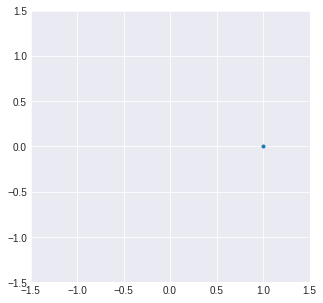

In [2]:
# Initialize Plot
fig, ax = plt.subplots(figsize=(5,5)) # Generate a single blank plot
pt, = ax.plot(1,0,'.') # Plot a single point initially, and save it to pt
plt.xlim([-1.5,1.5]) # Set my x limits
plt.ylim([-1.5,1.5]) # Set my y limits

Note an important point here. I gave the `ax.plot` call a name so that we can refer to it later to update those values. We can see the initial plot bounds and the dot we drew at our initial location. Now we'll write the function that will update the location of the dot each frame of the animation.

In [3]:
def animate(t):
    pt.set_xdata(np.cos(t)) # Set the x value for pt to this new value
    pt.set_ydata(np.sin(t)) # Set the y value for pt to this new value
    return pt,

Note here that we _move_, or reset the positions of $x$ and $y$ each time, and _don't make a new plot_! Now we just need to call the animation function. `FuncAnimation` takes arguments in the order of:
1. The figure of the animation
+ The animation function
+ List of inputs that go into animate (think a list of times)
+ Playback interval rate (frames per second)
+ A `Blit` option which you pretty much always want to be true to help speed things up

In [8]:
ani = FuncAnimation(fig, # The base figure I want to animate
                    animate, # The function that updates the values each frame
                    np.arange(0,4*np.pi,0.05), # A list of timesteps to run the animation over
                    interval=50, # A frame rate at which the animation will be played (fps)
                    blit=True) # Blitting will not redraw parts of the plot where nothing changed, and improves speed
plt.show()

This creates the animation and I close the plot so as to have also have a still image displayed. The last step is for use to use the HTML call to create a html5 version of the video to display in the browser. This is where all the individual frames are crunched, so it might take a bit to run!

In [9]:
HTML(ani.to_html5_video())

Generally, I would do all of this in a single cell. Below I replicate the above but add a extra plot element in the shape of a tail that I draw behind the point. And I also update the title with the current time.

In [10]:
# Initialize Plot
fig, ax = plt.subplots(figsize=(8,8))

# The point
pt, = ax.plot(1,0,'.')
# The trail
trail, = ax.plot(1,0,color='red')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('x')
plt.ylabel('y')
def animate(t):
    # Updating the point
    pt.set_xdata(np.cos(t))
    pt.set_ydata(np.sin(t))
    # Updating the trail
    # This time I just decided to make the trail all the points w/in the last 2 seconds
    ts = np.arange(t-2,t,0.01) # all earlier times
    trail.set_xdata(np.cos(ts)) # plot all earlier times
    trail.set_ydata(np.sin(ts))
    # Updating the title because its fun
    fig.suptitle(f'The time is: {t:0.2f}')
    return pt, trail
ani = FuncAnimation(fig, animate, np.arange(0,4*np.pi,0.05), interval=50, blit=True)
plt.close()
HTML(ani.to_html5_video())

And that is all there is to it! When you export to HTML, this animation should export nicely, so you can share them in the form of a webpage with all your friends.

## Animating in Real Time
To animate in real-time, matplotlib's inline command will not suffice, as it only creates static images. However, we can instead leverage the `notebook` option. This makes matplotlib graphs somewhat similar to those of Bokeh, but I've never liked the option as much and really only use it for animations. The necessary imports are thus:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
# And because I like pretty things
plt.style.use('seaborn-darkgrid')

We follow the same general form as before:

* Initialize the plot
* Plot initial values
* Create a function which will update desired values each frame of the animation
* Call the animation with `FuncAnimation`

Initializing the plot and plotting initial values:

In [2]:
# Initialize Plot
fig, ax = plt.subplots(figsize=(5,5))

pt, = ax.plot(1,0,'.')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

<IPython.core.display.Javascript object>

(-1.5, 1.5)

Writing our update expression:

In [3]:
def animate(t):
    pt.set_xdata(np.cos(t))
    pt.set_ydata(np.sin(t))
    return pt,

And calling the animation.

In [4]:
ani = FuncAnimation(fig, animate, np.arange(0,4*np.pi,0.01), interval=50, blit=True)
plt.show()

I would usually do all this in one cell, but it will work in separate cells. Look at your dot move! When you are tired of it going in circles you can hit the power looking button in the upper right.

You can add more pieces to an animation be initializing and updating more plotting objects. For instance, to leave a trail behind our dot, I'll create both a point and a line plot on the same figure. We might do something like:

In [5]:
# Initialize Plot
fig, ax = plt.subplots(figsize=(5,5))

# The trail
trail, = ax.plot(1,0,color='red')
# The point
pt, = ax.plot(1,0,'.')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
def animate(t):
    # Updating the point
    pt.set_xdata(np.cos(t))
    pt.set_ydata(np.sin(t))
    # Updating the trail
    #For each frame of the animation I want a red line to be drawn through all the old data
    ts = np.arange(0,t,0.01) # list of all earlier times
    trail.set_xdata(np.cos(ts)) # plot all earlier times
    trail.set_ydata(np.sin(ts))
    return pt, trail
ani = FuncAnimation(fig, animate, np.arange(0,4*np.pi,0.05), interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>

If you haven't already noticed, the animation will automatically loop. If these animations are running a bit slow on your system, realize that this is because Jupyter is calculating the next step in real-time as it tries to make the animation. As such, you can't easily share these animations, as someone would have to run them in Jupyter to see them.